In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
import json
import os
import sys
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from random import choice
from time import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df_f = pd.read_csv("Media_Movil.csv")
df_f = df_f.drop("Unnamed: 0", axis=1 )

In [3]:
df_f

,MediaMovil_3_score__h_1,MediaMovil_3_score__h_2,MediaMovil_3_score__a_1,MediaMovil_3_score__a_2,MediaMovil_6_score__h_1,MediaMovil_6_score__h_2,MediaMovil_6_score__a_1,MediaMovil_6_score__a_2,MediaMovil_9_score__h_1,MediaMovil_9_score__h_2,...,MediaMovil_12_dribbles_succeeded__porcentaje_h_1,MediaMovil_12_dribbles_succeeded__porcentaje_h_2,MediaMovil_12_dribbles_succeeded__porcentaje_a_1,MediaMovil_12_dribbles_succeeded__porcentaje_a_2,MediaMovil_15_dribbles_succeeded__porcentaje_h_1,MediaMovil_15_dribbles_succeeded__porcentaje_h_2,MediaMovil_15_dribbles_succeeded__porcentaje_a_1,MediaMovil_15_dribbles_succeeded__porcentaje_a_2,Resultado,Resultado_Numerico
0,0.000000,0.666667,0.666667,0.000000,0.500000,0.333333,0.333333,0.500000,0.444444,0.000000,...,3.250000,3.500000,3.500000,3.250000,2.733333,2.666667,2.666667,2.733333,D,1-1
1,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.222222,...,4.583333,4.666667,4.666667,4.583333,2.600000,2.800000,2.800000,2.600000,L,0-4>
2,0.000000,0.000000,0.000000,0.000000,0.333333,0.833333,0.833333,0.333333,0.111111,0.111111,...,6.250000,4.166667,4.166667,6.250000,4.600000,4.200000,4.200000,4.600000,L,1-3
3,0.666667,1.000000,1.000000,0.666667,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,...,4.500000,4.666667,4.666667,4.500000,3.533333,2.600000,2.600000,3.533333,L,2-3
4,0.000000,2.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.222222,...,3.500000,4.583333,4.583333,3.500000,3.533333,3.600000,3.600000,3.533333,W,3-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75014,0.333333,0.333333,0.333333,0.333333,0.166667,0.000000,0.000000,0.166667,0.111111,0.111111,...,3.916667,2.750000,2.750000,3.916667,4.200000,5.000000,5.000000,4.200000,L,0-1
75015,0.333333,0.666667,0.666667,0.333333,0.500000,0.333333,0.333333,0.500000,0.000000,0.333333,...,3.666667,4.416667,4.416667,3.666667,3.466667,2.200000,2.200000,3.466667,W,2-0
75016,0.666667,0.000000,0.000000,0.666667,0.166667,0.000000,0.000000,0.166667,0.111111,0.111111,...,4.750000,3.333333,3.333333,4.750000,3.000000,3.000000,3.000000,3.000000,W,3-1
75017,0.666667,0.333333,0.333333,0.666667,0.000000,0.166667,0.166667,0.000000,0.111111,0.111111,...,2.583333,3.333333,3.333333,2.583333,3.333333,3.133333,3.133333,3.333333,D,3-3


In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Codificación de etiquetas
label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(df_f["Resultado"])
Y = label_encoder.fit_transform(df_f["Resultado_Numerico"])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
Y = onehot_encoder.fit_transform(Y.reshape(-1, 1))
Y = np.asarray(Y).astype('float32')

X = df_f.drop(["Resultado","Resultado_Numerico"],axis =1)
X = np.asarray(X).astype('float32')
scaler = StandardScaler()
X = scaler.fit_transform(X)
# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


drop = 0.0
size_layer = 2 ^ 200
batch_size = 2 ^ 6
epoch = 10
model = Sequential([
    Dense(size_layer, activation='relu',
          input_shape=(X.shape[1],), use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(size_layer, activation='relu', use_bias=True,),
    Dense(Y.shape[1], activation='softmax', use_bias=True,)
])
# # Compilamos el modelo
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=True)
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.99, beta_2=0.9999)

hinge = tf.keras.losses.CategoricalHinge()
focal_cross = tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=0.2, gamma=2, from_logits=False, label_smoothing=0.0)
cross = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, label_smoothing=0.0)

model.compile(loss=cross,
              optimizer=adam, metrics=['categorical_accuracy',])

# # Entrenamos el modelo
history = model.fit(X_train, y_train, verbose=1, epochs=epoch, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/10
15004/15004 [==============================] - 21s 1ms/step - loss: 2.8886 - categorical_accuracy: 0.1155 - val_loss: 2.8750 - val_categorical_accuracy: 0.1212
Epoch 2/10
15004/15004 [==============================] - 20s 1ms/step - loss: 2.8688 - categorical_accuracy: 0.1200 - val_loss: 2.8692 - val_categorical_accuracy: 0.1216
Epoch 3/10
15004/15004 [==============================] - 20s 1ms/step - loss: 2.8634 - categorical_accuracy: 0.1207 - val_loss: 2.8668 - val_categorical_accuracy: 0.1216
Epoch 4/10
15004/15004 [==============================] - 20s 1ms/step - loss: 2.8616 - categorical_accuracy: 0.1208 - val_loss: 2.8698 - val_categorical_accuracy: 0.1205
Epoch 5/10
15004/15004 [==============================] - 20s 1ms/step - loss: 2.8597 - categorical_accuracy: 0.1215 - val_loss: 2.8712 - val_categorical_accuracy: 0.1200
Epoch 6/10
15004/15004 [==============================] - 20s 1ms/step - loss: 2.8595 - categorical_accuracy: 0.1215 - val_loss: 2.8654 - val_cat

1876/1876 [==============================] - 2s 801us/step


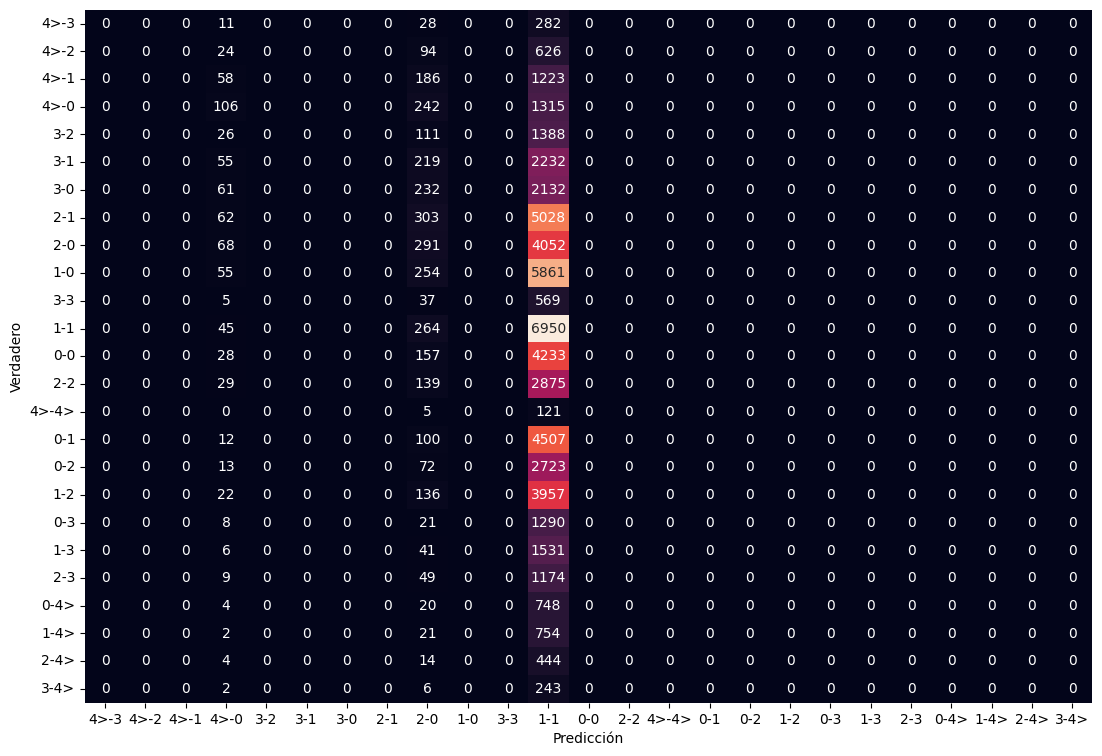

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


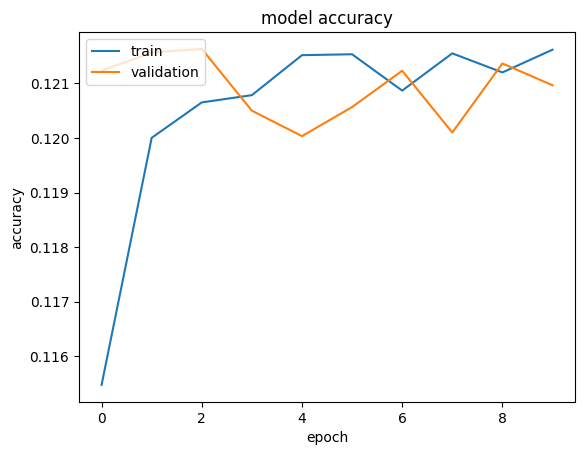

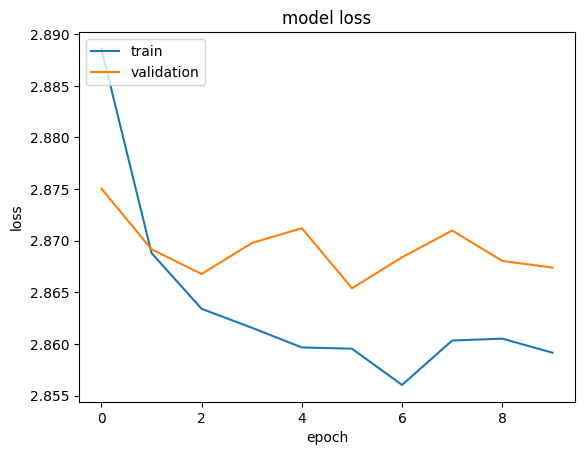

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from copy import deepcopy

y_prob = model.predict(X_train)
y_test_metrics = np.argmax(y_train, axis=1)
y_pred = np.argmax(y_prob, axis=1)

y_pred_copy = deepcopy(y_pred)
y_test_metrics_copy = deepcopy(y_test_metrics)


###########################################################################################################
# SOLO SI ES RESULTADO NUMERICO
# orden_bonito_max5 = np.array([18, 21, 22, 24, 27, 31, 14, 17, 23, 25, 28, 32, 13, 12, 19,
#                               26, 29, 33, 11, 10, 9, 16, 30, 34, 8, 7, 6, 5, 20, 35, 4, 3, 2, 1, 0, 15])
orden_bonito_max4 = np.array(
    [12, 15, 16, 18, 21, 9, 11, 17, 19, 22, 8, 7, 13, 20, 23, 6, 5, 4,10, 24, 3, 2, 1, 0, 14])
orden_bonito = orden_bonito_max4

label = [0 for i in range(len(orden_bonito))]
for i in range(len(label_encoder.classes_)):
    label[orden_bonito[i]] = label_encoder.classes_[i]
    y_pred[y_pred_copy == i] = orden_bonito[i]
    y_test_metrics[y_test_metrics_copy == i] = orden_bonito[i]

label = np.array(label)
###########################################################################################################
# RESULTADO GENERAL
# label =label_encoder.classes_
###########################################################################################################
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_metrics, y_pred)
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [10]:
print(classification_report(y_test_metrics, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.00      0.00      0.00       744
           2       0.00      0.00      0.00      1467
           3       0.15      0.06      0.09      1663
           4       0.00      0.00      0.00      1525
           5       0.00      0.00      0.00      2506
           6       0.00      0.00      0.00      2425
           7       0.00      0.00      0.00      5393
           8       0.10      0.07      0.08      4411
           9       0.00      0.00      0.00      6170
          10       0.00      0.00      0.00       611
          11       0.12      0.96      0.22      7259
          12       0.00      0.00      0.00      4418
          13       0.00      0.00      0.00      3043
          14       0.00      0.00      0.00       126
          15       0.00      0.00      0.00      4619
          16       0.00      0.00      0.00      2808
          17       0.00    

c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Lo siguiente va solo si se hizo el resultado numérico

In [11]:
y_test_metrics_simplificado = []
y_pred_simplificado = []
for i in range(len(y_test_metrics)):
    if y_test_metrics[i] <= 9:
        y_test_metrics_simplificado.append(0)
    elif y_test_metrics[i] <= 14:
        y_test_metrics_simplificado.append(1)
    else:
        y_test_metrics_simplificado.append(2)
        
for i in range(len(y_pred)):
    if y_pred[i] <= 9:
        y_pred_simplificado.append(0)
    elif y_pred[i] <= 14:
        y_pred_simplificado.append(1)
    else:
        y_pred_simplificado.append(2)

        

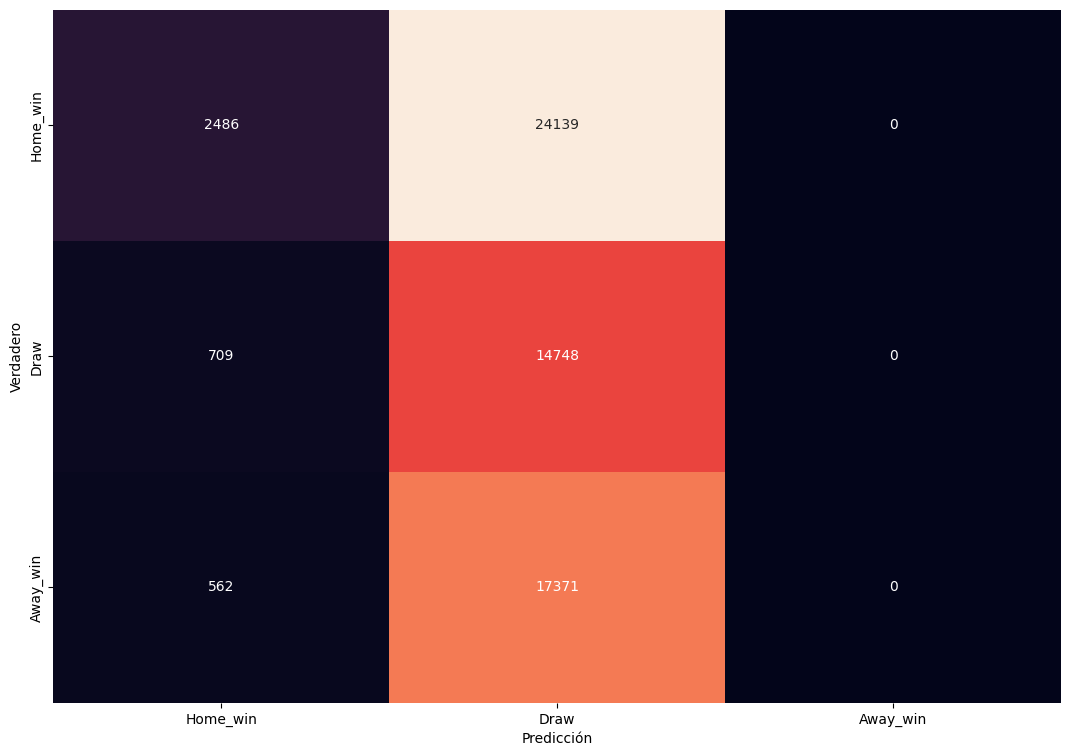

In [12]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_simplificado)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [13]:
print(classification_report(y_test_metrics_simplificado, y_pred_simplificado))

              precision    recall  f1-score   support

           0       0.66      0.09      0.16     26625
           1       0.26      0.95      0.41     15457
           2       0.00      0.00      0.00     17933

    accuracy                           0.29     60015
   macro avg       0.31      0.35      0.19     60015
weighted avg       0.36      0.29      0.18     60015



c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [14]:
y_prob_suma = []
for i in range(len(y_prob)):
    aux = [0, 0, 0]
    for j in range(len(orden_bonito)):
        if orden_bonito[j] <=9:
            aux[0] += y_prob[i][j]
        elif orden_bonito[j] <=14:
            aux[1] += y_prob[i][j]
        else:
            aux[2] += y_prob[i][j]
    y_prob_suma.append(aux)
y_prob_suma = np.array(y_prob_suma) 
y_pred_suma = np.argmax(y_prob_suma, axis=1)

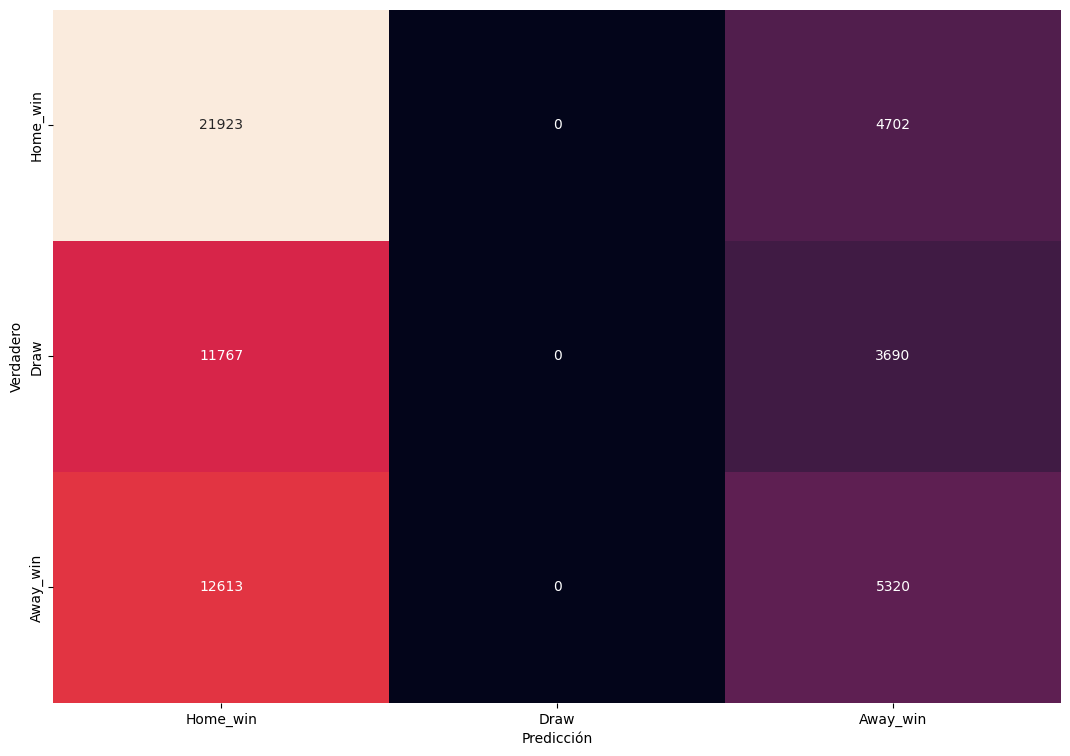

In [15]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_suma)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [16]:
print(classification_report(y_test_metrics_simplificado, y_pred_suma))

              precision    recall  f1-score   support

           0       0.47      0.82      0.60     26625
           1       0.00      0.00      0.00     15457
           2       0.39      0.30      0.34     17933

    accuracy                           0.45     60015
   macro avg       0.29      0.37      0.31     60015
weighted avg       0.33      0.45      0.37     60015



c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [50]:
# Importamos librerías necesarias
import pandas as pd
from catboost import CatBoostClassifier, Pool

# Cargamos el dataset (reemplazar 'data.csv' con su archivo)
data = pd.read_csv("Media_Movil.csv")
data = data.drop("Unnamed: 0", axis=1 )
data = data.drop("Resultado",axis=1)

categorical_cols = data.select_dtypes(include="object").columns
if len(categorical_cols) > 0:  # Check if any categorical features exist
    cat_features = list(categorical_cols)
else:
    cat_features = None  # No categorical features, set to None


# Separamos las características (X) de la clase (y)
X = data.drop(["Resultado_Numerico"], axis=1)
y = data["Resultado_Numerico"]

# Dividimos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos Pool para CatBoost (maneja datos categóricos)
train_pool = Pool(
    data=X_train, label=y_train
)
test_pool = Pool(X_test, label=y_test)

# Definimos el modelo CatBoost
model = CatBoostClassifier(
    iterations=500, learning_rate=0.03, loss_function="CrossEntropy", silent=True
)

# Entrenamos el modelo
model.fit(train_pool)

# Realizamos predicciones
predictions = model.predict(test_pool)

# Evaluamos el rendimiento (por ejemplo, F1-score)
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average="weighted")
print("F1-score:", f1)


F1-score: 0.04465517929137527


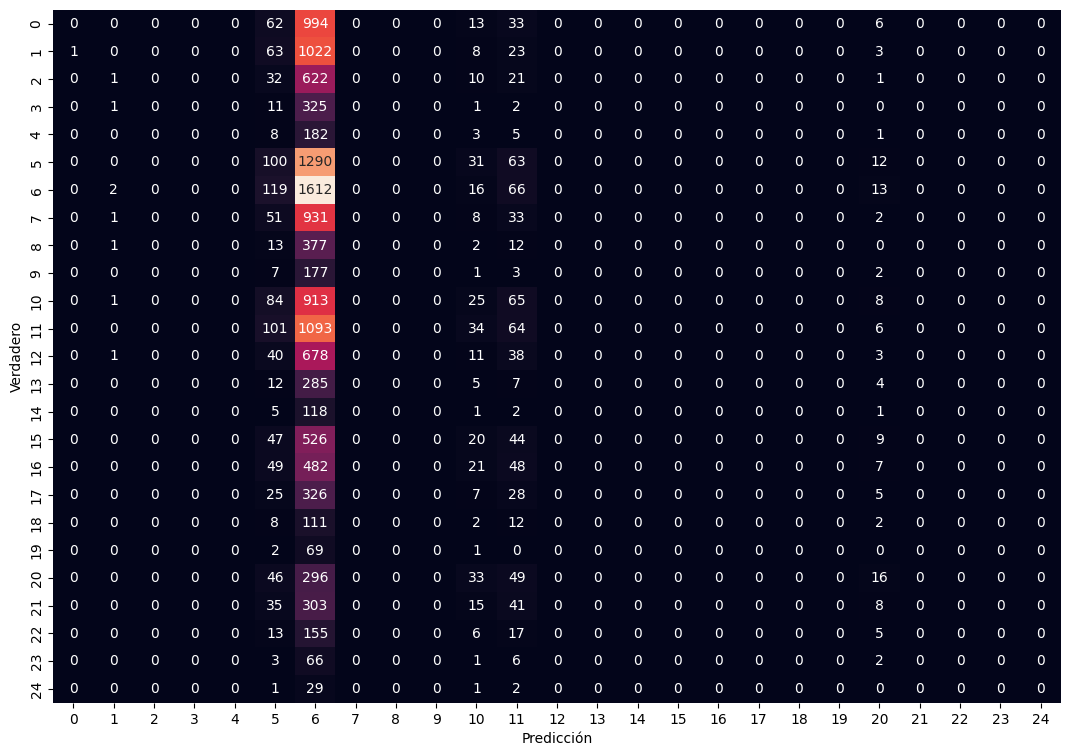

In [55]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)

plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0-0       0.00      0.00      0.00      1108
         0-1       0.00      0.00      0.00      1120
         0-2       0.00      0.00      0.00       687
         0-3       0.00      0.00      0.00       340
        0-4>       0.00      0.00      0.00       199
         1-0       0.11      0.07      0.08      1496
         1-1       0.12      0.88      0.22      1828
         1-2       0.00      0.00      0.00      1026
         1-3       0.00      0.00      0.00       405
        1-4>       0.00      0.00      0.00       190
         2-0       0.09      0.02      0.04      1096
         2-1       0.09      0.05      0.06      1298
         2-2       0.00      0.00      0.00       771
         2-3       0.00      0.00      0.00       313
        2-4>       0.00      0.00      0.00       127
         3-0       0.00      0.00      0.00       646
         3-1       0.00      0.00      0.00       607
         3-2       0.00    

c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,